In [ ]:
#2
import pandas as pd
import numpy as np

df = pd.read_excel('../data/factor_pricing_data_monthly.xlsx', sheet_name='factors (excess returns)')
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df.set_index('Date', inplace=True)
df.head()

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0550,0.0188,0.0185,-0.0184,0.0189,0.0745
1980-02-29,-0.0123,-0.0162,0.0059,-0.0095,0.0292,0.0789
1980-03-31,-0.1289,-0.0697,-0.0096,0.0182,-0.0105,-0.0958
1980-04-30,0.0396,0.0105,0.0103,-0.0218,0.0034,-0.0048
1980-05-31,0.0526,0.0200,0.0038,0.0043,-0.0063,-0.0118


In [2]:
# 2.1

Freq = 12
m = df.mean() * Freq
s = df.std() * np.sqrt(Freq)
sr = m / s

summary = pd.DataFrame({
    'Mean': m,
    'Volatility': s,
    'Sharpe': sr
})
summary = summary.round(4)
summary

,Mean,Volatility,Sharpe
MKT,0.0876,0.1561,0.5607
SMB,0.0061,0.1013,0.0604
HML,0.0260,0.1088,0.2392
RMW,0.0440,0.0829,0.5311
CMA,0.0283,0.0725,0.3903
UMD,0.0603,0.1534,0.3933


In [3]:
df_2015 = df[df.index >= '2015-01-01'].copy()

m_2015 = df_2015.mean() * Freq
s_2015 = df_2015.std() * np.sqrt(Freq)
sr_2015 = m_2015 / s_2015

summary_2015 = pd.DataFrame({
    'Mean': m_2015,
    'Volatility': s_2015,
    'Sharpe': sr_2015
})
summary_2015 = summary_2015.round(4)
summary_2015

,Mean,Volatility,Sharpe
MKT,0.1179,0.1574,0.7491
SMB,-0.0238,0.1032,-0.2305
HML,-0.0163,0.1299,-0.1255
RMW,0.0400,0.0726,0.5509
CMA,-0.0091,0.0821,-0.1114
UMD,0.0201,0.1374,0.1464


<span style="color:blue">

#2.2

ANS: Each factor has a positive risk premium when we look at full sample. However, the risk premium of SMB, HML, CMA turn negative if we just look at the time period after 2015.

Correlation Matrix (across six factors):


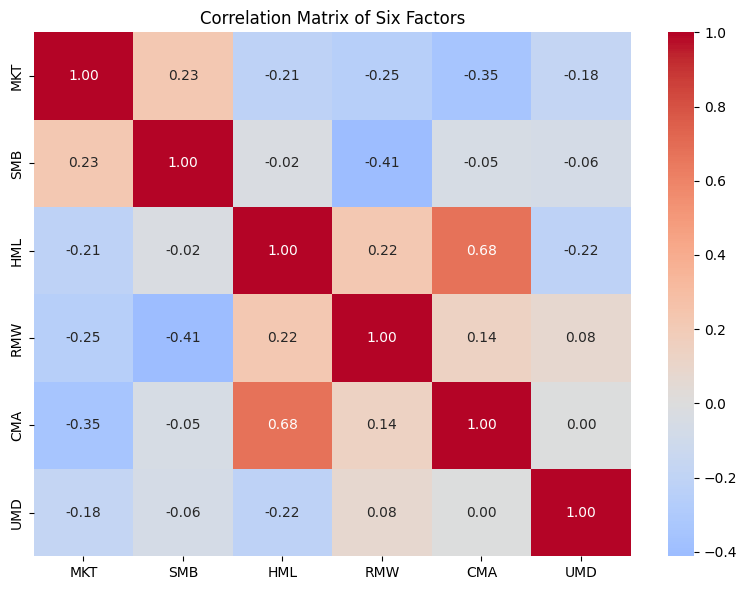

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
print("Correlation Matrix (across six factors):")
#print(corr_matrix.round(3))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Six Factors")
plt.tight_layout()
plt.show()


<span style="color:blue">

ANS: Most correlation is lower than 0.4, shows that the construction method succeeds in keeping correlations small.
HML has a relatively high correlation (0.68) with CMA, this may be the reason Fama and French say that HML is somewhat redundant in their 5-factor model.

In [6]:
#2.4

# Tengency Portfolio with 6 FACTORS
mean_returns = df.mean()
cov_matrix = df.cov()

inv_cov = np.linalg.inv(cov_matrix)
ones = np.ones(len(df.columns))
weights = inv_cov @ mean_returns
weights = weights / (ones @ weights) 

tangency_weights = pd.Series(weights, index=df.columns)
print("Tangency Portfolio Weights (6 factors):")
print(tangency_weights.round(4))

port_mean = mean_returns @ tangency_weights
port_vol = np.sqrt(tangency_weights.T @ cov_matrix @ tangency_weights)
sharpe_ratio = port_mean / port_vol
print(f"\nTangency Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")


Tangency Portfolio Weights (6 factors):
MKT    0.2186
SMB    0.0668
HML   -0.0212
RMW    0.3018
CMA    0.3214
UMD    0.1125
dtype: float64

Tangency Portfolio Sharpe Ratio: 0.3468


<span style="color:blue">

ANS: 

CMA factor seems the most important (0.32), while the HML factor seems the least important(-0.02).

The factor with lowest mean return is SMB, it still has 6.7% weight in the tengency portfolio.

In [8]:
# Tengency Portfolio with 4 FACTORS

subset = df[['MKT', 'SMB', 'HML', 'UMD']]
mean4 = subset.mean()
cov4 = subset.cov()

inv_cov4 = np.linalg.inv(cov4)
ones4 = np.ones(len(subset.columns))
weights4 = inv_cov4 @ mean4
weights4 = weights4 / (ones4 @ weights4)

tangency_weights_4 = pd.Series(weights4, index=subset.columns)
print("\nTangency Portfolio Weights (4 factors):")
print(tangency_weights_4.round(4))

port_mean4 = mean4 @ tangency_weights_4
port_vol4 = np.sqrt(tangency_weights_4.T @ cov4 @ tangency_weights_4)
sharpe_ratio4 = port_mean4 / port_vol4
print(f"\nTangency Portfolio Sharpe Ratio (4 factors): {sharpe_ratio4:.4f}")


Tangency Portfolio Weights (4 factors):
MKT    0.3765
SMB   -0.0512
HML    0.3653
UMD    0.3094
dtype: float64

Tangency Portfolio Sharpe Ratio (4 factors): 0.2638


<span style="color:blue">

ANS: MKT factor seems the most important (0.38), while the SMB factor seems the least important(-0.05).

SMB has low weight in both portfolio, so it seems last important. Meanwhile, HML is only impotant when CMA and RMW is not been consider. This states that HML is redundant by CMA abd RMW.